In [1]:
# This notebook will 
# read in all of the target frames, 
# calculate keypoints and normalize them.
# read in all user frames
# calculate keypoints,
# calculate keypoints and normalize them
# calculate euclidean distance between them

In [2]:
from matplotlib import pyplot as plt
import mediapipe as mp
from urllib import request
import os
import pathlib
from pathlib import Path
import cv2
import numpy as np
import matplotlib.pyplot as plt
import gc

mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

In [3]:
def get_input_filenames(name, base_names):
    """appends the name of the person onto the base file name for poses"""
    new_frames_fnames = []

    for fname in base_names:
        splitname = fname.split(".")
        splitname[0] += ("_"+ name)
        new_name = ".".join(splitname)
        new_frames_fnames.append(new_name)

    return new_frames_fnames

In [4]:
def get_filenames():

    teacher_frames_fnames = ["pose_1_frame.png", "pose_2_frame.png", "pose_3_frame.png",
                             "pose_4_frame.png", "pose_5_frame.png", "pose_6_frame.png"]

    lori_frame_fnames = get_input_filenames("lori", teacher_frames_fnames)

    mikaela_frame_fnames = get_input_filenames("mikaela", teacher_frames_fnames)

    jong_frame_fnames = get_input_filenames("jong", teacher_frames_fnames)

    return teacher_frames_fnames, lori_frame_fnames, mikaela_frame_fnames, jong_frame_fnames

teacher_frames_fnames, lori_frame_fnames, mikaela_frame_fnames, jong_frame_fnames = get_filenames()

In [5]:
def get_blazepose_lmks(image):
    pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.2, model_complexity=2)
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    return results.pose_landmarks

In [6]:
def get_image(fname, segmented=False):
    """returns the cv2 image"""
    
    if segmented:
        imagedir = Path.joinpath(pathlib.Path().resolve(), "pose_frames_segmented_pngs")
    else:
        imagedir = Path.joinpath(pathlib.Path().resolve(), "pose_frames")
        
    imagedir = Path.joinpath(imagedir, fname)
    img_cv = cv2.imread(str(imagedir))

    img_cv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)

    return img_cv

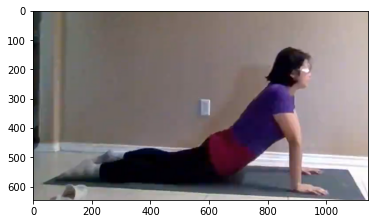

In [7]:
imgf = get_image("pose_1_frame_lori.png", segmented=False)
plt.imshow(imgf)
plt.show()

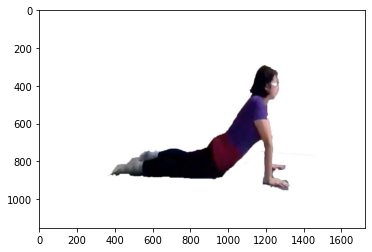

In [8]:
#imgf = get_image("pose_6_frame_jong.png", segmented=False)
imgf = get_image("pose_1_frame_lori.png", segmented=True)
plt.imshow(imgf)
plt.show()

In [9]:
rslts = get_blazepose_lmks(imgf)

In [10]:
for lmk in rslts.landmark:
    print(lmk.y)

0.3404083251953125
0.32480180263519287
0.3251388669013977
0.32542988657951355
0.3260153532028198
0.3271265923976898
0.32807695865631104
0.33749112486839294
0.33960509300231934
0.36552944779396057
0.3666669726371765
0.43541401624679565
0.4433208107948303
0.5859504342079163
0.6211601495742798
0.7022905349731445
0.781880259513855
0.721980094909668
0.7994414567947388
0.7290238738059998
0.7957070469856262
0.7281143665313721
0.7898032665252686
0.6435127258300781
0.6851567029953003
0.6785588264465332
0.7444130182266235
0.6774648427963257
0.7197892665863037
0.655860185623169
0.691877543926239
0.7085855007171631
0.7554483413696289


In [11]:
def calculate_euclidian_distance(base_fname, target_fname, segmented=False):
    """reads in two images, gets the landmarks and calculates euclidian distance (L2 Norm)for each keypoint"""
    
    base_lmks = get_blazepose_lmks(get_image(base_fname, segmented))
    target_lmks = get_blazepose_lmks(get_image(target_fname, segmented))
    
    total_key_points = len(base_lmks.landmark)
    sum_dist = 0
    
    for b, t, in zip(base_lmks.landmark, target_lmks.landmark):
        base_coords = np.array([b.x, b.y, b.z])
        target_coords = np.array([t.x, t.y, t.z])
        # print(base_coords)
        # print(target_coords)
        # euclidian distance
        sum_dist += np.linalg.norm(base_coords-target_coords)
        
    #print("Sum Error: ", round(sum_dist/total_key_points, 3))
    return round(sum_dist/total_key_points, 4)

In [12]:
calculate_euclidian_distance("pose_1_frame.png", "pose_1_frame_lori.png", segmented=True)

0.0699

In [13]:
calculate_euclidian_distance("pose_1_frame.png", "pose_1_frame_lori.png", segmented=False)

0.2869

In [13]:
#teacher_files, lori_files, mikaela_files, jong_files = get_filenames()

In [14]:
def compare_all_images(segmented=False):
    """calculates the sum euclidian distance for each image and prints the images"""
    teacher_files, lori_files, mikaela_files, jong_files = get_filenames()
    
    avg_distances = {"teacher vs. lori": [],
                     "teacher vs. mikaela": [],
                     "teacher vs. jong": []}
    
    average_distances = {"1": [0],
                        "2": [0],
                        "3": [0],
                        "4": [0],
                        "5": [0],
                        "6": [0]
                        }
    
    for frame, teacher, lori, mikaela, jong in zip(average_distances.keys(), teacher_files, lori_files, mikaela_files, jong_files):
        #avg_distances["teacher vs. lori"]
        average_distances[frame].append(calculate_euclidian_distance(teacher, lori, segmented))
        #avg_distances["teacher vs. mikaela"]
        average_distances[frame].append(calculate_euclidian_distance(teacher, mikaela, segmented))
        #avg_distances["teacher vs. jong"]
        average_distances[frame].append(calculate_euclidian_distance(teacher, jong, segmented))
        
    return average_distances

In [ ]:
#avg_dist = compare_all_images()

In [15]:
#avg_dist_segmented = compare_all_images(segmented=True)

In [22]:
def display_results(avg_dist, segmented=False):
    """displays a 3x4 grid of frames with keypoints and 'Euclidian Distance from Teacher' next them"""
    
    teacher_files, lori_files, mikaela_files, jong_files = get_filenames()
    for i, (dists, teacher, lori, mikaela, jong) in enumerate(zip(avg_dist.values(), teacher_files, lori_files, mikaela_files, jong_files)):
        if i in target_images:
            # get image
            images = []
            images.append(get_image_with_keypoints(teacher, segmented))
            images.append(get_image_with_keypoints(lori, segmented))
            images.append(get_image_with_keypoints(mikaela, segmented))
            images.append(get_image_with_keypoints(jong, segmented))

            fig, axs = plt.subplots(1, 4, figsize=(16, 8))
            for ax, img, dist in zip(axs, images, dists):
                ax.imshow(img)
                ax.set_title(f"Average Euclidian Dist: {dist}")
            if segmented:
                plt.savefig(f"Segmented Pose {i+1} Comparison.png")
            else:
                plt.savefig(f"Pose {i+1} Comparison.png")

In [17]:
def get_image_with_keypoints(fname, segmented=False):
    """prints an image with keypoints on it"""
    if segmented:
        imagedir = Path.joinpath(pathlib.Path().resolve(), "pose_frames_segmented_pngs")
    else:
        imagedir = Path.joinpath(pathlib.Path().resolve(), "pose_frames")
        
    imagedir = Path.joinpath(imagedir, fname)
    imagedirstr = str(imagedir)
    img = cv2.imread(imagedirstr)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img2 = img
    
    pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.2, model_complexity=2)
    results = pose.process(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    
    mp_drawing.draw_landmarks(
        image=img2,
        landmark_list=results.pose_landmarks,
        connections=mp_pose.POSE_CONNECTIONS)
    
    #mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
    
    return img2

In [33]:
# Only do one at a time or you run out of memory
regular_avg_dists = compare_all_images()
#segmented_avg_dists = compare_all_images(segmented=True)
display_results(regular_avg_dists)

NameError: name 'regularcompare_all_images' is not defined

In [24]:
#teacher_files, lori_files, mikaela_files, jong_files = get_filenames()
#for dists, teacher, lori, mikaela, jong in zip(avg_dist.values(), teacher_files, lori_files, mikaela_files, jong_files):
#    # get image
#    images = []
#    images.append(get_image_with_keypoints(teacher))
#    images.append(get_image_with_keypoints(lori))
#    images.append(get_image_with_keypoints(mikaela))
#    images.append(get_image_with_keypoints(jong))

In [25]:
#len(images)

In [22]:
def print_image(fname):
    """given a string .png or .jpg file name, reads in the image and prints it"""
    
    imagedir = Path.joinpath(pathlib.Path().resolve(), "pose_frames")
    imagedir = Path.joinpath(imagedir, fname)
    imagedirstr = str(imagedir)
    img = cv2.imread(imagedirstr)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.show()

In [26]:
#print_image(mikaela_frame_fnames[1])

In [27]:
def print_image_with_keypoints(fname):
    """prints an image with keypoints on it"""
    
    imagedir = Path.joinpath(pathlib.Path().resolve(), "pose_frames")
    imagedir = Path.joinpath(imagedir, fname)
    imagedirstr = str(imagedir)
    img = cv2.imread(imagedirstr)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img2 = img
    
    pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.2, model_complexity=2)
    results = pose.process(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    
    mp_drawing.draw_landmarks(
        image=img2,
        landmark_list=results.pose_landmarks,
        connections=mp_pose.POSE_CONNECTIONS)
    
    mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
    
    plt.figure(figsize=(10,10))
    plt.imshow(img2)
    plt.show()

In [24]:
#imgslists = []
#imgslists.append(get_image_with_keypoints("pose_1_frame.png"))
#imgslists.append(get_image_with_keypoints("pose_1_frame_lori.png"))
#imgslists.append(get_image_with_keypoints("pose_1_frame_mikaela.png"))
#imgslists.append(get_image_with_keypoints("pose_1_frame_jong.png"))

In [28]:
#fig, axs = plt.subplots(1, 4, figsize=(16, 8))
#for ax, img in zip(axs, imgslists):
#    ax.imshow(img)
#plt.show()

In [29]:
#plt.imshow(get_image_with_keypoints("pose_1_frame.png"))
#plt.title("Euclidian Distance")
#plt.show()

In [30]:
#imagedir = Path.joinpath(pathlib.Path().resolve(), "pose_frames")

#[name for name in os.listdir(imagedir) if len(name) == 16]

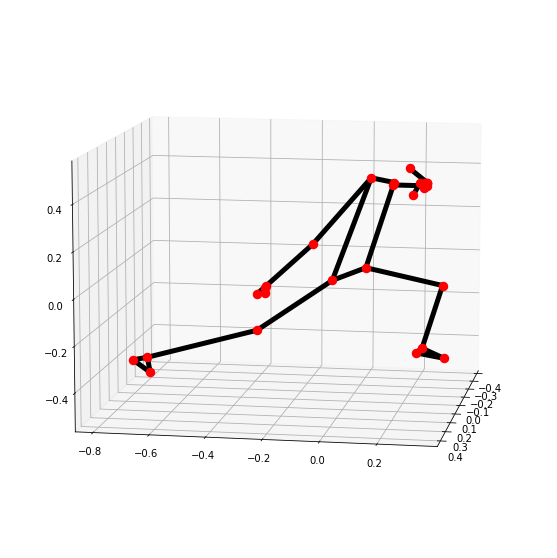

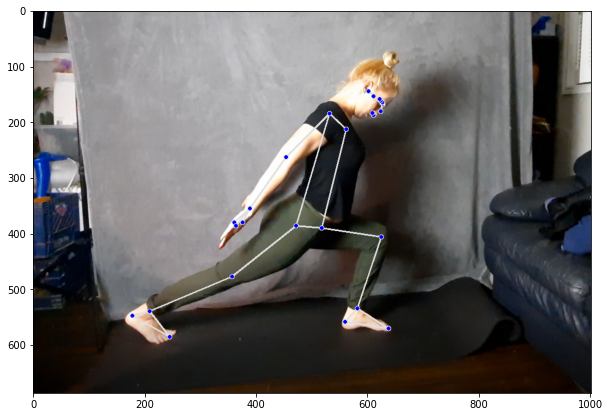

In [32]:
print_image_with_keypoints(mikaela_frame_fnames[1])

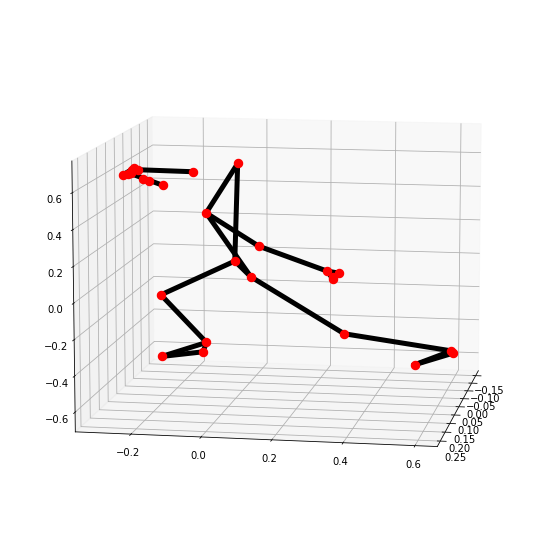

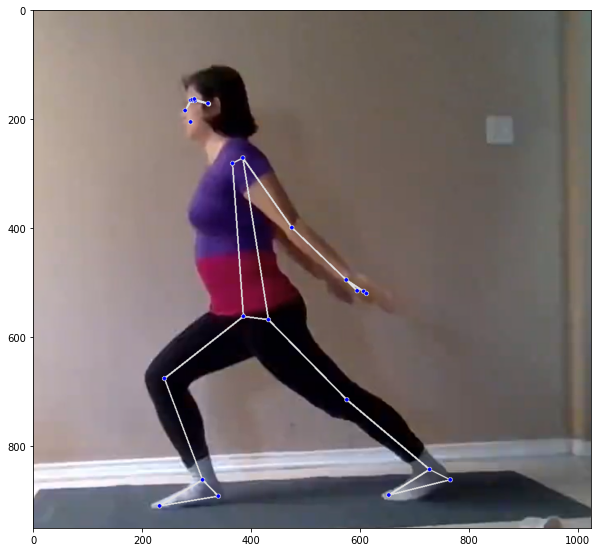

In [130]:
print_image_with_keypoints(lori_frame_fnames[1])

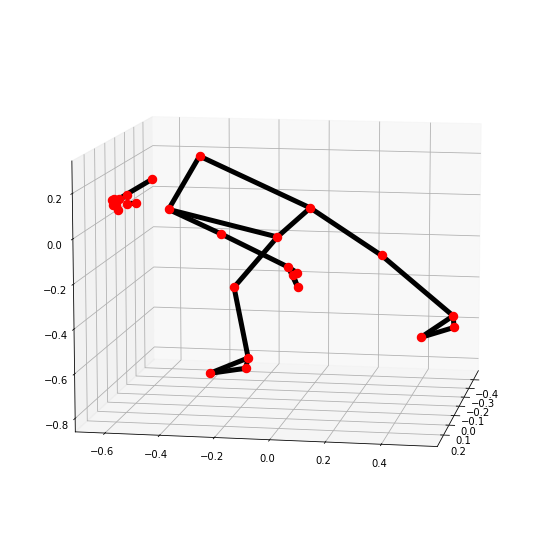

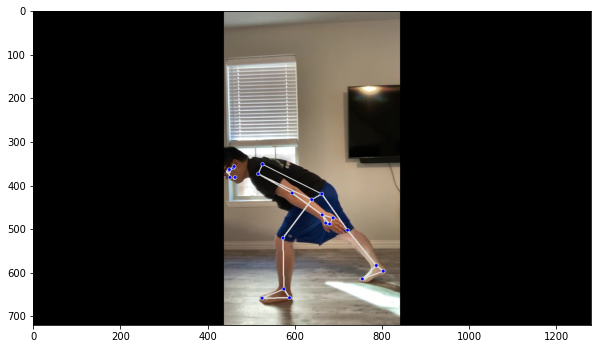

In [131]:
print_image_with_keypoints(jong_frame_fnames[1])

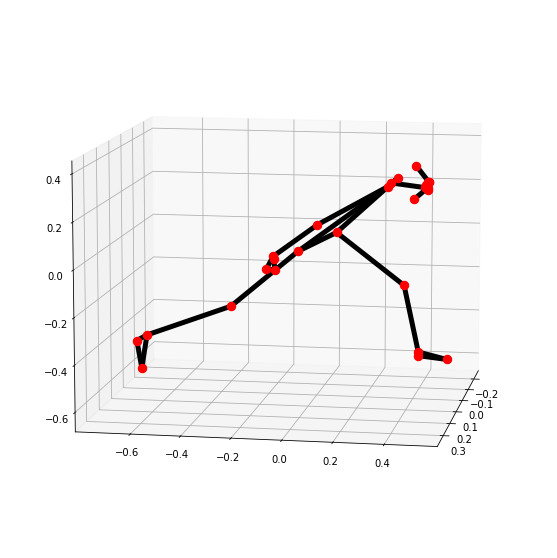

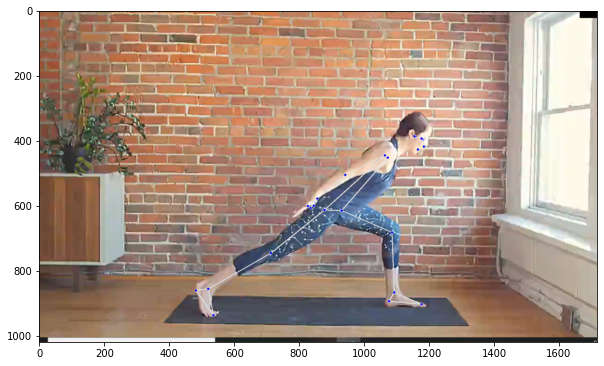

In [133]:
print_image_with_keypoints(teacher_frames_fnames[1])

In [135]:
class FullBodyPoseEmbedder(object):
    """Converts 3D pose landmarks into 3D embedding."""

    def __init__(self, torso_size_multiplier=2.5):
        # Multiplier to apply to the torso to get minimal body size.
        self._torso_size_multiplier = torso_size_multiplier

        # Names of the landmarks as they appear in the prediction.
        self._landmark_names = [
            'nose',
            'left_eye_inner', 'left_eye', 'left_eye_outer',
            'right_eye_inner', 'right_eye', 'right_eye_outer',
            'left_ear', 'right_ear',
            'mouth_left', 'mouth_right',
            'left_shoulder', 'right_shoulder',
            'left_elbow', 'right_elbow',
            'left_wrist', 'right_wrist',
            'left_pinky_1', 'right_pinky_1',
            'left_index_1', 'right_index_1',
            'left_thumb_2', 'right_thumb_2',
            'left_hip', 'right_hip',
            'left_knee', 'right_knee',
            'left_ankle', 'right_ankle',
            'left_heel', 'right_heel',
            'left_foot_index', 'right_foot_index',
        ]

    def __call__(self, landmarks):
        """Normalizes pose landmarks and converts to embedding

        Args:
          landmarks - NumPy array with 3D landmarks of shape (N, 3).

        Result:
          Numpy array with pose embedding of shape (M, 3) where `M` is the number of
          pairwise distances defined in `_get_pose_distance_embedding`.
        """
        assert landmarks.shape[0] == len(self._landmark_names), 'Unexpected number of landmarks: {}'.format(landmarks.shape[0])

        # Get pose landmarks.
        landmarks = np.copy(landmarks)

        # Normalize landmarks.
        landmarks = self._normalize_pose_landmarks(landmarks)

        # Get embedding.
        embedding = self._get_pose_distance_embedding(landmarks)

        return embedding

    def _normalize_pose_landmarks(self, landmarks):
        """Normalizes landmarks translation and scale."""
        landmarks = np.copy(landmarks)

        # Normalize translation.
        pose_center = self._get_pose_center(landmarks)
        landmarks -= pose_center

        # Normalize scale.
        pose_size = self._get_pose_size(landmarks, self._torso_size_multiplier)
        landmarks /= pose_size
        # Multiplication by 100 is not required, but makes it eaasier to debug.
        landmarks *= 100

        return landmarks

    def _get_pose_center(self, landmarks):
        """Calculates pose center as point between hips."""
        left_hip = landmarks[self._landmark_names.index('left_hip')]
        right_hip = landmarks[self._landmark_names.index('right_hip')]
        center = (left_hip + right_hip) * 0.5
        return center

    def _get_pose_size(self, landmarks, torso_size_multiplier):
        """Calculates pose size.

        It is the maximum of two values:
          * Torso size multiplied by `torso_size_multiplier`
          * Maximum distance from pose center to any pose landmark
        """
        # This approach uses only 2D landmarks to compute pose size.
        landmarks = landmarks[:, :2]

        # Hips center.
        left_hip = landmarks[self._landmark_names.index('left_hip')]
        right_hip = landmarks[self._landmark_names.index('right_hip')]
        hips = (left_hip + right_hip) * 0.5

        # Shoulders center.
        left_shoulder = landmarks[self._landmark_names.index('left_shoulder')]
        right_shoulder = landmarks[self._landmark_names.index('right_shoulder')]
        shoulders = (left_shoulder + right_shoulder) * 0.5

        # Torso size as the minimum body size.
        torso_size = np.linalg.norm(shoulders - hips)

        # Max dist to pose center.
        pose_center = self._get_pose_center(landmarks)
        max_dist = np.max(np.linalg.norm(landmarks - pose_center, axis=1))

        return max(torso_size * torso_size_multiplier, max_dist)

    def _get_pose_distance_embedding(self, landmarks):
        """Converts pose landmarks into 3D embedding.

        We use several pairwise 3D distances to form pose embedding. All distances
        include X and Y components with sign. We differnt types of pairs to cover
        different pose classes. Feel free to remove some or add new.

        Args:
          landmarks - NumPy array with 3D landmarks of shape (N, 3).

        Result:
          Numpy array with pose embedding of shape (M, 3) where `M` is the number of
          pairwise distances.
        """
        embedding = np.array([
            # One joint.

            self._get_distance(
                self._get_average_by_names(landmarks, 'left_hip', 'right_hip'),
                self._get_average_by_names(landmarks, 'left_shoulder', 'right_shoulder')),

            self._get_distance_by_names(landmarks, 'left_shoulder', 'left_elbow'),
            self._get_distance_by_names(landmarks, 'right_shoulder', 'right_elbow'),

            self._get_distance_by_names(landmarks, 'left_elbow', 'left_wrist'),
            self._get_distance_by_names(landmarks, 'right_elbow', 'right_wrist'),

            self._get_distance_by_names(landmarks, 'left_hip', 'left_knee'),
            self._get_distance_by_names(landmarks, 'right_hip', 'right_knee'),

            self._get_distance_by_names(landmarks, 'left_knee', 'left_ankle'),
            self._get_distance_by_names(landmarks, 'right_knee', 'right_ankle'),

            # Two joints.

            self._get_distance_by_names(landmarks, 'left_shoulder', 'left_wrist'),
            self._get_distance_by_names(landmarks, 'right_shoulder', 'right_wrist'),

            self._get_distance_by_names(landmarks, 'left_hip', 'left_ankle'),
            self._get_distance_by_names(landmarks, 'right_hip', 'right_ankle'),

            # Four joints.

            self._get_distance_by_names(landmarks, 'left_hip', 'left_wrist'),
            self._get_distance_by_names(landmarks, 'right_hip', 'right_wrist'),

            # Five joints.

            self._get_distance_by_names(landmarks, 'left_shoulder', 'left_ankle'),
            self._get_distance_by_names(landmarks, 'right_shoulder', 'right_ankle'),

            self._get_distance_by_names(landmarks, 'left_hip', 'left_wrist'),
            self._get_distance_by_names(landmarks, 'right_hip', 'right_wrist'),

            # Cross body.

            self._get_distance_by_names(landmarks, 'left_elbow', 'right_elbow'),
            self._get_distance_by_names(landmarks, 'left_knee', 'right_knee'),

            self._get_distance_by_names(landmarks, 'left_wrist', 'right_wrist'),
            self._get_distance_by_names(landmarks, 'left_ankle', 'right_ankle'),

            # Body bent direction.

            # self._get_distance(
            #     self._get_average_by_names(landmarks, 'left_wrist', 'left_ankle'),
            #     landmarks[self._landmark_names.index('left_hip')]),
            # self._get_distance(
            #     self._get_average_by_names(landmarks, 'right_wrist', 'right_ankle'),
            #     landmarks[self._landmark_names.index('right_hip')]),
        ])

        return embedding

    def _get_average_by_names(self, landmarks, name_from, name_to):
        lmk_from = landmarks[self._landmark_names.index(name_from)]
        lmk_to = landmarks[self._landmark_names.index(name_to)]
        return (lmk_from + lmk_to) * 0.5

    def _get_distance_by_names(self, landmarks, name_from, name_to):
        lmk_from = landmarks[self._landmark_names.index(name_from)]
        lmk_to = landmarks[self._landmark_names.index(name_to)]
        return self._get_distance(lmk_from, lmk_to)

    def _get_distance(self, lmk_from, lmk_to):
        return lmk_to - lmk_from

In [136]:
class PoseSimilarityCalculator():
    """calculates pose similarities
       names is a list of participant names which creates a dictionary 
       where the landmarks will be stored.
       ex. ["teacher", "lori", "mikaela", "jong"]
    """
    def __init__(self,
                 pose_samples_folder,
                 names,
                 pose_embedder,
                 n_landmarks=33,
                 n_dimensions=3,
                 top_n_by_max_distance=30,
                 top_n_by_mean_distance=10,
                 axes_weights=(1., 1., 0.2)):
        
        self._pose_embedder = pose_embedder
        self._n_landmarks = n_landmarks
        self._n_dimensions = n_dimensions
        self._axes_weights = axes_weights
        self._names = {}
        for name in names:
            self._names[name] = []
            
        
        self._pose_samples = self._load_pose_samples(pose_samples_folder,
                                                     names,
                                                     n_landmarks,
                                                     n_dimensions,
                                                     pose_embedder)
        
    def _load_pose_samples(self,
                           names,
                           pose_samples_folder,
                           n_landmarks,
                           n_dimensions,
                           pose_embedder):
    """Loads pose samples from a given folder.
    
    Required folder structure:
      pose_1_frame_<name>.png
      pose_2_frame_<name>.png
      pose_3_frame_<name>.png
      pose_4_frame_<name>.png
      pose_5_frame_<name>.png
      pose_6_frame_<name>.png
      ...

    """
    # Each name represents a set of 6 poses
    file_names = [name for name in os.listdir(pose_samples_folder) if name.endswith(file_extension)]

    pose_samples = []
    for file_name in file_names:
      # Use file name as pose class name.
      class_name = file_name[:-(len(file_extension) + 1)]
      
      # Parse CSV.
      with open(os.path.join(pose_samples_folder, file_name)) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=file_separator)
        for row in csv_reader:
          assert len(row) == n_landmarks * n_dimensions + 1, 'Wrong number of values: {}'.format(len(row))
          landmarks = np.array(row[1:], np.float32).reshape([n_landmarks, n_dimensions])
          pose_samples.append(PoseSample(
              name=row[0],
              landmarks=landmarks,
              class_name=class_name,
              embedding=pose_embedder(landmarks),
          ))

    return pose_samples